In [1]:
import numpy as np
import persim
import tadasets
import ripser
import matplotlib.pyplot as plt
import gudhi
import time

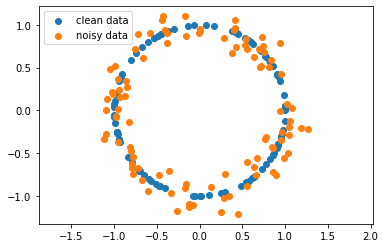

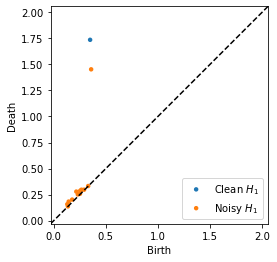

In [2]:
data_clean = tadasets.dsphere(d=1, n=100, noise=0.0)
data_noisy = tadasets.dsphere(d=1, n=100, noise=0.1)
plt.scatter(data_clean[:,0], data_clean[:,1], label="clean data")
plt.scatter(data_noisy[:,0], data_noisy[:,1], label="noisy data")
plt.axis('equal')
plt.legend()
plt.show()

dgm_clean = ripser.ripser(data_clean)['dgms'][1]
dgm_noisy = ripser.ripser(data_noisy)['dgms'][1]
persim.plot_diagrams([dgm_clean, dgm_noisy] , labels=['Clean $H_1$', 'Noisy $H_1$'])
plt.show()

POT (Python Optimal Transport) package is not installed. Try to run $ conda install -c conda-forge pot ; or $ pip install POT
Elapsed Time Matching: 0.167


NameError: name 'wdist' is not defined

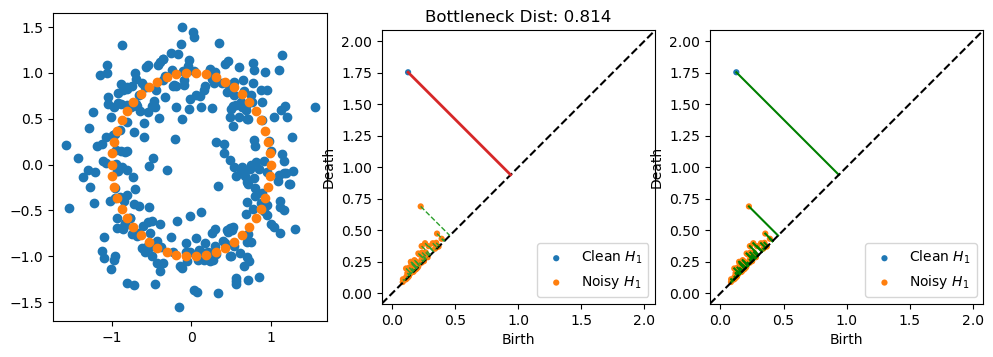

In [3]:
import gudhi.wasserstein

# First point cloud has no noise
N1 = 50
X1 = np.zeros((N1, 2))
t1 = np.linspace(0, 2*np.pi, N1+1)[0:N1]
X1[:, 0] = np.cos(t1)
X1[:, 1] = np.sin(t1)

# Second point cloud has a lot of noisy points
N2 = 300
t2 = np.linspace(0, 2*np.pi, N2+1)[0:N2]
X2 = np.zeros((N2, 2))
X2[:, 0] = np.cos(t2)
X2[:, 1] = np.sin(t2)
X2 = X2 + 0.25*np.random.randn(N2, 2)


I1 = ripser.ripser(X1)['dgms'][1]
I2= ripser.ripser(X2)['dgms'][1]


# Perform the matchings

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X2[:, 0], X2[:, 1])
plt.scatter(X1[:, 0], X1[:, 1])
plt.subplot(132)

tic = time.time()
distance_bottleneck, matching = persim.bottleneck(I1, I2, matching=True)
persim.bottleneck_matching(I1, I2, matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
print("Elapsed Time Matching: %.3g"%(time.time()-tic))

plt.title("Bottleneck Dist: %.3g"%distance_bottleneck)
plt.subplot(133)

#wdist, (matching, D) = persim.wasserstein(I1, I2, matching=True)


persim.wasserstein_matching(I1, I2,matching,labels=['Clean $H_1$', 'Noisy $H_1$'])
plt.title("Wasserstein Dist: %.3g"%wdist)
plt.show()

In [4]:
message = "Wasserstein distance value = " + '%.2f' % gudhi.wasserstein.wasserstein_distance(I1, I2, order=1., internal_p=2.)
print(message)

NameError: name 'ot' is not defined